Based on YouTube video.

Deep Learning 54: CNN - Implementation of CNN from Scratch in Python
https://www.youtube.com/watch?v=0zbhg79i_Bs&t=409s

In [48]:
import numpy as np
from numpy import asarray
import cv2
import matplotlib.pyplot as plt

In [49]:
import wget

wget.download("http://bigbang.prz.edu.pl/si/Lenna.png")

'Lenna (2).png'

In [50]:
#Check if the image downloaded correctly
import os

# Używanie os
print("Używanie os:")
for entry in os.scandir('.'):
    print(f"{entry.stat().st_size} {entry.name}")

Używanie os:
7501 CNN_from_scratch.ipynb
91089 Lenna (1).png
91089 Lenna (2).png
91089 Lenna.png


### Display the Image

<class 'numpy.ndarray'>
(225, 225)


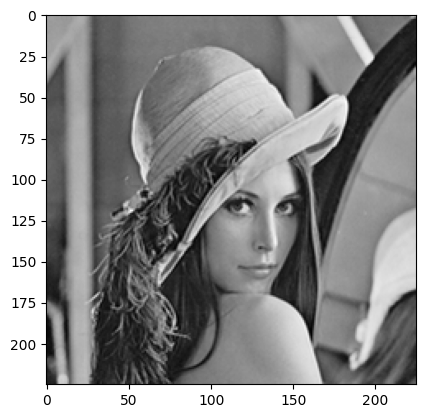

In [51]:
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)/255
print(type(img))
print(img.shape)
plt.imshow(img, cmap = 'gray')
plt.show()

In [52]:
#Definition of the convolutional layer of a neural network using OOP
#In the class are methods responsible for forward propagation (feedforward) and changing weights - learning (backward propagation)

class Conv_OP:
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.conv_filter = np.random.randn(num_filters, filter_size, filter_size)/(filter_size * filter_size)

    def image_region(self, image):
        height, width = image.shape
        self.image = image

        for i in range(height - self.filter_size + 1):
            for j in range(width - self.filter_size + 1):
                image_patch = image[i:(i + self.filter_size), j:(j + self.filter_size)]
                yield image_patch, i, j

    def forward_prop(self, image):
        height, width = image.shape
        conv_out = np.zeros((height - self.filter_size + 1, width - self.filter_size + 1, self.num_filters))
        for image_path, i, j in self.image_region(image):
            conv_out[i, j] = np.sum(image_path * self.conv_filter, axis = (1, 2))
        
        return conv_out
    
    def back_prop(self, dl_dout, learning_rate):
        dl_dF_params = np.zeros(self.conv_filter.shape)
        for image_patch, i, j in self.image_region(self.image):
            for k in range(self.num_filters):
                dl_dF_params[k] += image_patch * dl_dout[i, j, k]

        self.conv_filter == learning_rate * dl_dF_params

        return dl_dF_params

### Let's see how the convolutional layer transcends data

In [54]:
#Crate a new convutional layer using created object Conv_OP
conn = Conv_OP(3, 3)

#Throw an image into convolutional layer
out = conn.forward_prop(img)

#Image shape before convolutional process
print(img.shape)

#Image shape after convolutional process
print(out.shape)

(225, 225)
(223, 223, 3)


### Let's display the image after the convolution process through several filters

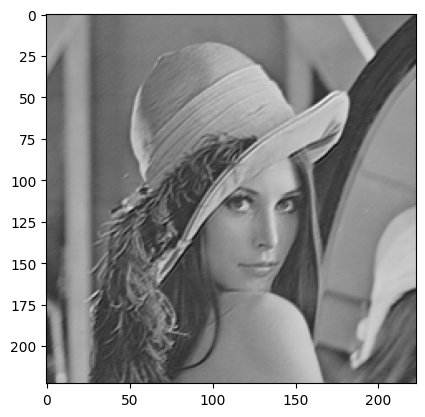

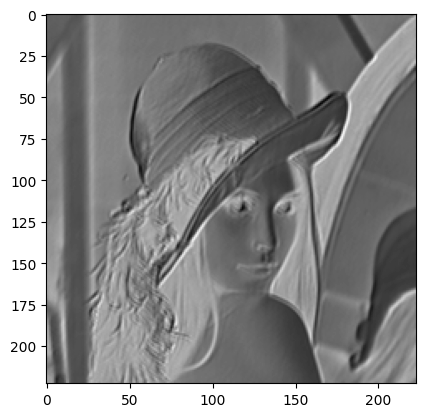

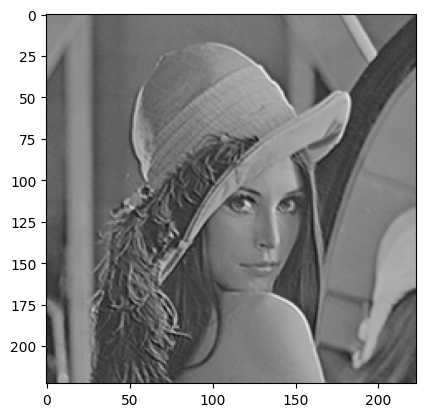

In [55]:
filters_number = out.shape[2]

for i in range(0, filters_number):
    plt.imshow(out[:,:,i], cmap = 'gray')
    plt.show()

### We can use example filters, which can be found at this link:

https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [56]:
#What the filters look like
conn.conv_filter

array([[[ 0.07945558, -0.06658524,  0.01200021],
        [-0.16478046,  0.04485111,  0.02164073],
        [ 0.1134074 ,  0.21831042,  0.00514703]],

       [[ 0.13132579, -0.00519609, -0.12391198],
        [-0.02001711, -0.0291842 , -0.02578319],
        [ 0.03298189, -0.1358007 , -0.03403002]],

       [[-0.08773277,  0.06413802,  0.01301526],
        [ 0.0965922 , -0.13486978, -0.06131984],
        [ 0.23061604,  0.09039804, -0.00846304]]])

(3, 3, 3)


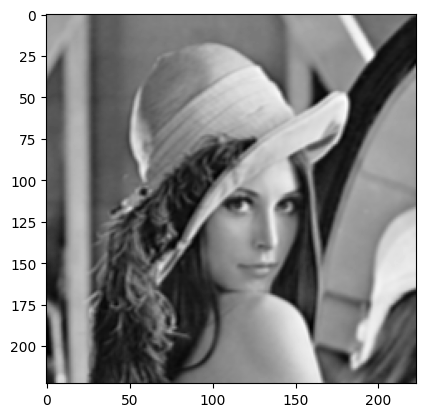

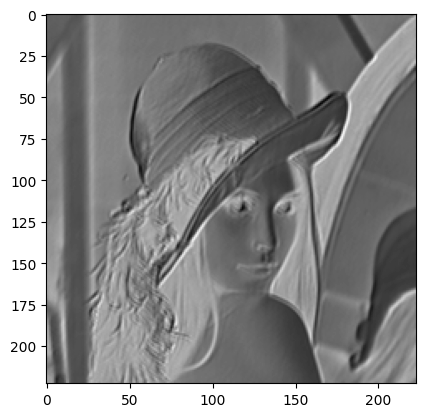

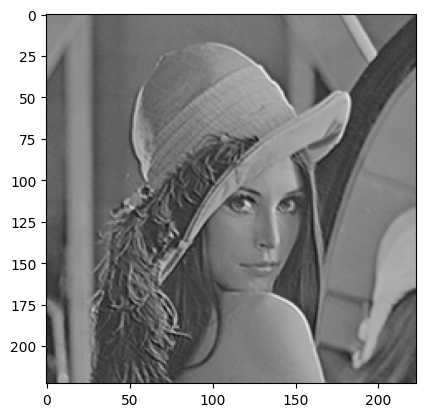

In [57]:
print(conn.conv_filter.shape)

my_filter = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

conn.conv_filter[0, :, :] = my_filter

out = conn.forward_prop(img)
number_of_filters = out.shape[2]

for i in range(0, number_of_filters):
    plt.imshow(out[:, :, i], cmap='gray')
    plt.show()

In [58]:
#The definition of Max Pool layer class responsible for reducing the resolution of the image
#and leaving the pixels with the highest intensity

class Max_Pool:
    def __init__(self, filter_size):
        self.filter_size = filter_size

    def image_region(self, image):
        new_height = image.shape[0] // self.filter_size
        new_width = image.shape[1] // self.filter_size
        self.image = image

        for i in range(new_height):
            for j in range(new_width):
                image_patch = image[(i * self.filter_size):(i * self.filter_size + self.filter_size), (j * self.filter_size):(j * self.filter_size + self.filter_size)]
                yield image_patch, i, j

    def forward_prop(self, image):
        height, width, num_filters = image.shape
        output = np.zeros((height // self.filter_size, width // self.filter_size, num_filters))

        for image_patch, i, j in self.image_region(image):
            output[i, j] = np.amax(image_patch, axis = (0, 1))

        return output
    
    def back_prop(self, dl_dout):
        dl_dmax_pool = np.zeros(self.image.shape)
        for image_patch, i, j in self.image_region(self.image):
            height, width, num_filters = image_patch.shape
            maximum_val = np.amax(image_patch, axis = (0, 1))

            for i1 in range(height):
                for j1 in range(width):
                    for k1 in range(num_filters):
                        if image_patch[i1, j1, k1] == maximum_val[k1]:
                            dl_dmax_pool[i * self.filter_size + i1, j * self.filter_size + j1, k1] = dl_dout[i, j, k1]
            return dl_dmax_pool

### Maxpool example

In [59]:
#Create a maxpool layer and select the size of the area from which the max_pool operation is to be performed
maxpool = Max_Pool(5)

#Adding a third dimension to the insult so maxpool can take it in
img = np.reshape(img, (img.shape[0], img.shape[1], 1))

print(f'Image shape before maxpool: {img.shape}')
out2= maxpool.forward_prop(img)
print(f'Image shape after maxpool: {out2.shape}')

Image shape before maxpool: (225, 225, 1)
Image shape after maxpool: (45, 45, 1)


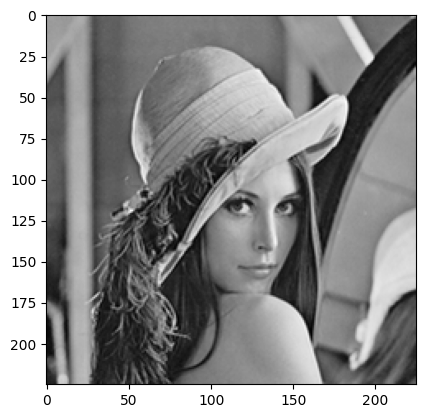

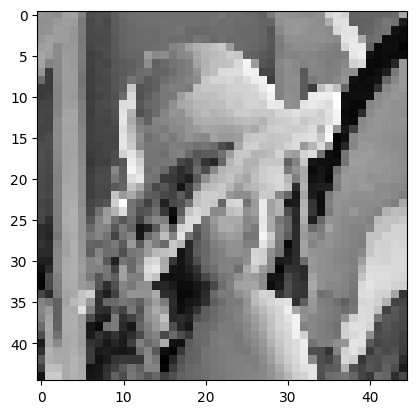

In [60]:
#Check out how the original Lenna looks after the maxpool operation
plt.imshow(img,cmap='gray')
plt.show()

for i in range(0, out2.shape[2]):
  plt.imshow(out2[:,:,i],cmap='gray')

  plt.show()

(14, 14, 3)


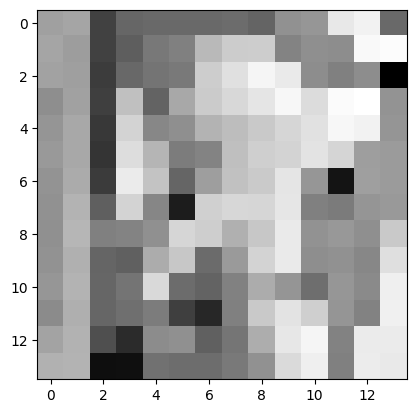

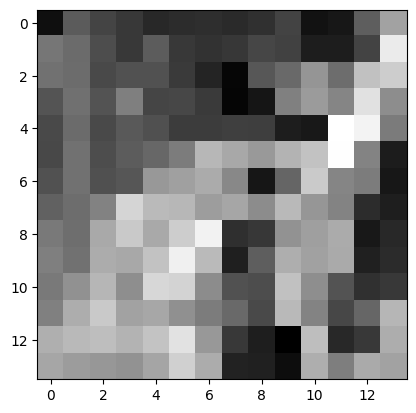

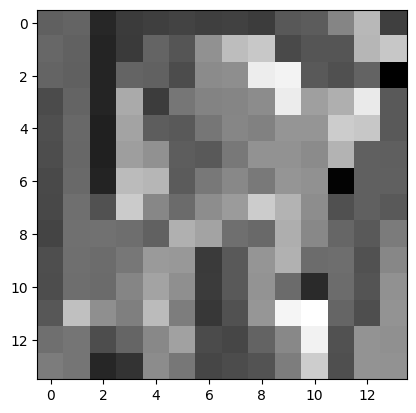

In [61]:
#Lenna images after convolution operations by a given number of filters (default 6) and maxpool operations
maxpool = Max_Pool(15)
#We use the image 'out', which is the image after the convolution
out2= maxpool.forward_prop(out)
print(out2.shape)

#Maxpool for the image after passing through the convolution layer
for i in range(0, out2.shape[2]):
  plt.imshow(out2[:,:,i],cmap='gray')

  plt.show()

### Softmax Layer

In [62]:
#Definition of the last layer of the neural network

#To recognize the class of image "inserted" in the input of the neural network for example, a dog or a cat, layer has as many neurons as classes to be distributed
#each neuron returns a probability that the object in the input belongs to the class represented by it
class Softmax:
  def __init__(self, input_node, softmax_node):
    #input_node - liczba pixeli (wartosci na wejsciu)
    #softmax - liczba neuronow
    self.weight = np.random.randn(input_node, softmax_node)/input_node
    self.bias = np.zeros(softmax_node)

  def forward_prop(self, image):
    self.orig_im_shape = image.shape #used in backprop
    image_modified = image.flatten()
    self.modified_input = image_modified #to be used in backprop
    output_val = np.dot(image_modified, self.weight) + self.bias
    self.out = output_val
    exp_out = np.exp(output_val)
    return exp_out/np.sum(exp_out, axis=0)

  def back_prop(self, dL_dout, learning_rate):
    for i, grad in enumerate(dL_dout):
      if grad ==0:
        continue

      transformation_eq = np.exp(self.out)
      S_total = np.sum(transformation_eq)

      #gradients with respect to out (z)
      dy_dz = -transformation_eq[i]*transformation_eq / (S_total **2)
      dy_dz[i] = transformation_eq[i]*(S_total -  transformation_eq[i]) / (S_total **2)


      #gradients of totals against weights/biases/input
      dz_dw =  self.modified_input
      dz_db = 1
      dz_d_inp = self.weight

      #gradients of loss against totals
      dL_dz = grad * dy_dz

      #gradients of loss against weights/biases/input
      dL_dw = dz_dw[np.newaxis].T @ dL_dz[np.newaxis]
      dL_db = dL_dz * dz_db
      dL_d_inp = dz_d_inp @ dL_dz

    self.weight -= learning_rate *dL_dw
    self.bias -= learning_rate * dL_db

    return dL_d_inp.reshape(self.orig_im_shape)


Image shape: (14, 14, 3)


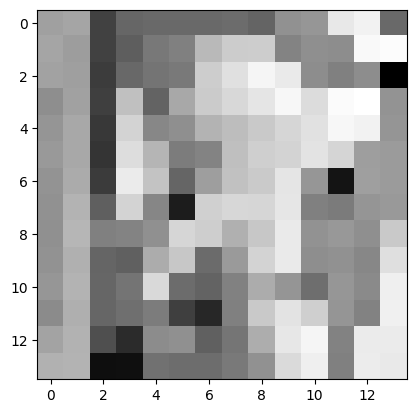

In [63]:
#Let's check the size of the image after the convolution operation and maxpool which is under the variable out2
print(f'Image shape: {out2.shape}')
plt.imshow(out2[:,:,0],cmap='gray')

In [65]:
#Example of the values returned by the softmax layer

#When creating a layer, the first argument is the number of pixels that the image has, multiplied by the number of filters
#The second argument is the number of data classes to recognize, i.e. the number of neurons at the output of the network
conn3 = Softmax(14*14*3,10)
out3 = conn3.forward_prop(out2)
print(out3)

[0.2154284  0.01625151 0.03323732 0.06071415 0.02572781 0.05057163
 0.11076952 0.16902959 0.06073659 0.25753348]


In [66]:
#Which neuron won the image recognition
#WTA - Winner Take All
print(np.argmax(out3))
print(np.max(out3))

9
0.2575334780399654


In [67]:
#SoftMax layer output values add up to 1
np.sum(out3)

0.9999999999999999

# Network training on the MNIST set (recognition of handwritten digits)

In [68]:
#Download the MNIST collection using the keras library
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Take only the first 1500 digits because it's slow to count
train_images = X_train[:1500]
train_labels = y_train[:1500]
test_images = X_test[:1500]
test_labels = y_test[:1500]


11490434/11490434 [==============================] - 2s 0us/step


(1500, 28, 28)
Label: 7
Digit resolution: (28, 28)


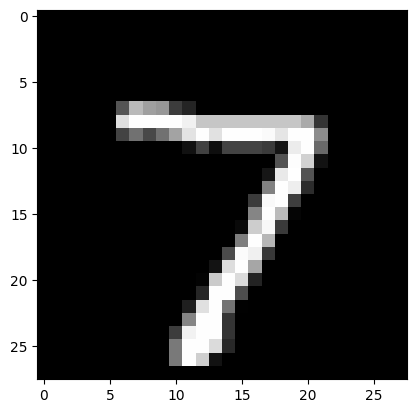

In [71]:
print(test_images.shape)
plt.imshow(test_images[0,:,:],cmap='gray')
print(f'Label: {test_labels[0]}')
print(f'Digit resolution: {train_images[0].shape}')

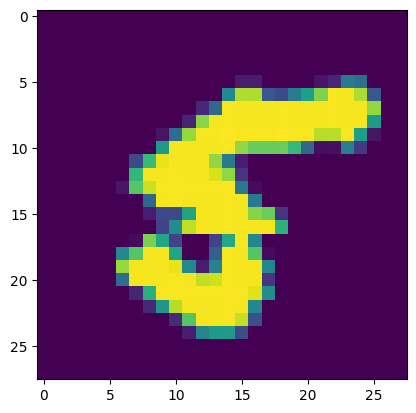

In [73]:
#Display a random number from the first 1500 numbers
from random import randint

img_num = randint(0,1499)
plt.imshow(train_images[img_num])

In [74]:
#Creation of a neural network - definition of layers
conv = Conv_OP(10, 5) # (number of filters, size of convolution-square window)
pool = Max_Pool(3) # (window size max_pool)
softmax = Softmax(8*8*10, 10) # (number of visible pixels by softmax layer, number of neurons))

#Count ONE image by NN network
def cnn_forward_prop(image, label):
  out_p = conv.forward_prop(image)
  out_p = pool.forward_prop(out_p)
  out_p = softmax.forward_prop(out_p)

  #Calculate cross-entropy loss and accuracy
  cross_ent_loss = -np.log(out_p[label])
  #Whether the picture was recognized correctly
  accuracy_eval = 1 if np.argmax(out_p) == label else 0

  return out_p, cross_ent_loss, accuracy_eval

In [75]:
#Neural network training
def training_cnn(image, label, learn_rate =0.005):

  #FORWARD PASS
  out, loss, acc = cnn_forward_prop(image, label)

  #Calculate ininital gradient
  gradient = np.zeros(10)
  gradient[label] = -1 / out[label]

  #BACKPROP
  grad_back = softmax.back_prop(gradient, learn_rate)
  grad_back = pool.back_prop(grad_back)
  grad_back = conv.back_prop(grad_back, learn_rate)

  return loss, acc

In [76]:
train_images = train_images/255 -0.5
test_images = test_images/255 -0.5

In [77]:
#Training CNN
for epoch1 in range(1):
  print('Epoch %d ->'% (epoch1 +1))

  #Shuffle the training data
  shuffle_data = np.random.permutation(len(train_images))
  train_images = train_images[shuffle_data]
  train_labels = train_labels[shuffle_data]

  #Training the CNN
  loss = 0.0
  num_correct = 0

  for i, (im, label) in enumerate(zip(train_images, train_labels)):
    if i % 100 == 0:
      print('%d steps out of 100 steps: Average Loss %.3f and Accuracy: %d%%' %(i+1, loss/100, num_correct))
      loss = 0
      num_correct = 0

    #Upload the image to the network and correct the weights of the network so that the network in the next era for this image recognizes better
    l1, accu = training_cnn(im, label)
    loss += l1

    num_correct +=accu

Epoch 1 ->
1 steps out of 100 steps: Average Loss 0.000 and Accuracy: 0%
101 steps out of 100 steps: Average Loss 2.285 and Accuracy: 22%
201 steps out of 100 steps: Average Loss 2.241 and Accuracy: 33%
301 steps out of 100 steps: Average Loss 2.231 and Accuracy: 32%
401 steps out of 100 steps: Average Loss 2.198 and Accuracy: 34%
501 steps out of 100 steps: Average Loss 2.129 and Accuracy: 49%
601 steps out of 100 steps: Average Loss 2.142 and Accuracy: 38%
701 steps out of 100 steps: Average Loss 2.122 and Accuracy: 39%
801 steps out of 100 steps: Average Loss 2.061 and Accuracy: 55%
901 steps out of 100 steps: Average Loss 2.053 and Accuracy: 60%
1001 steps out of 100 steps: Average Loss 2.012 and Accuracy: 63%
1101 steps out of 100 steps: Average Loss 1.947 and Accuracy: 70%
1201 steps out of 100 steps: Average Loss 1.943 and Accuracy: 61%
1301 steps out of 100 steps: Average Loss 1.992 and Accuracy: 61%
1401 steps out of 100 steps: Average Loss 1.863 and Accuracy: 72%


In [78]:
#Testing the accuracy of cnn
print('**testing phase')
loss = 0
num_correct = 0

for im, label in zip(test_images, test_labels):
  _, l1, accu = cnn_forward_prop(im, label)
  loss += l1
  num_correct += accu

num_test = len(test_images)
print('Test Loss:', loss /num_test)
print('Test accuracy:', num_correct / num_test)

**testing phase
Test Loss: 1.906246835628185
Test accuracy: 0.6093333333333333


### What the filters look like in CNN's learned simple network

(10, 5, 5)


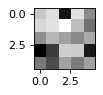

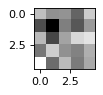

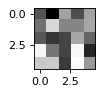

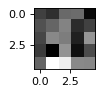

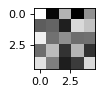

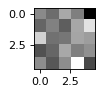

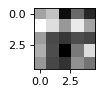

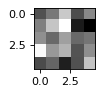

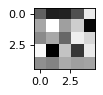

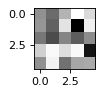

In [79]:
#Display the image after the process of convolution through a set number of filters each filter generates its own image
from matplotlib.pyplot import figure

print(conv.conv_filter.shape)

filters_num = conv.conv_filter.shape[0]

for i in range(0, filters_num):
  figure(figsize=(1, 1), dpi=80)
  plt.imshow(conv.conv_filter[i,:,:],cmap='gray')
  plt.show()

### How the filters will work on Lenna's image

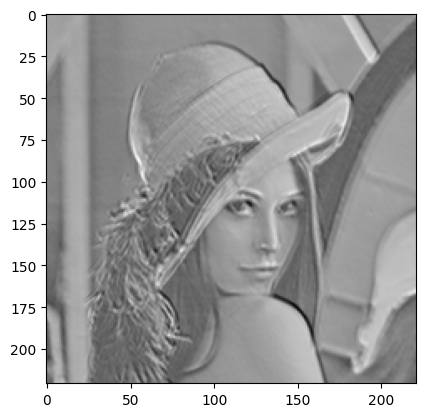

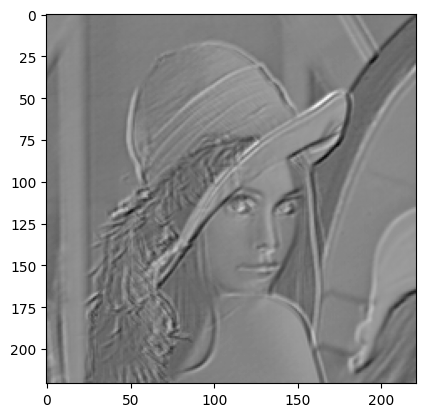

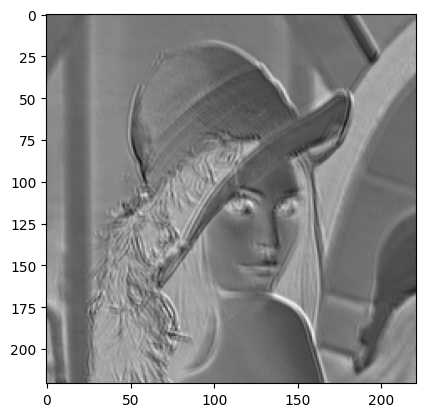

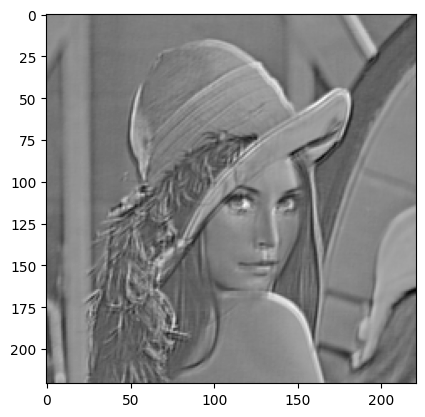

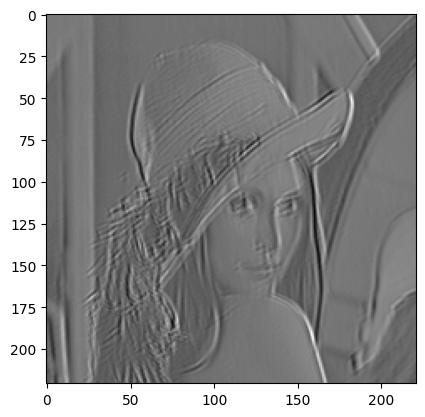

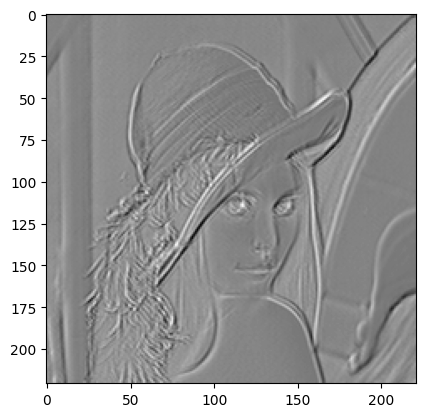

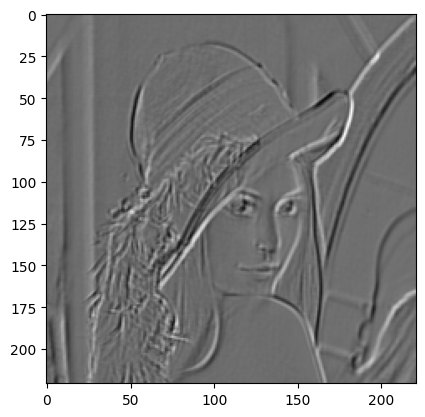

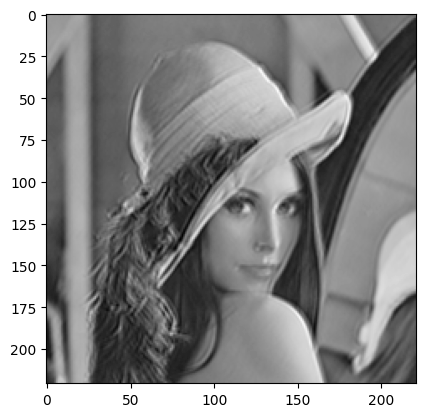

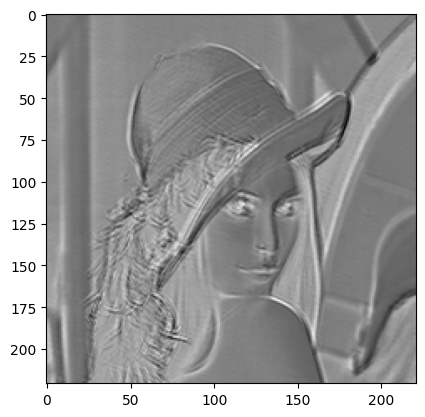

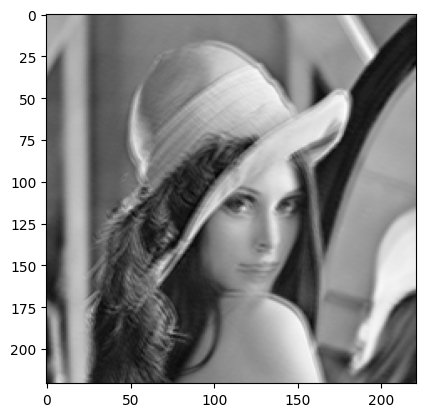

In [81]:
#Put the image into the convolution layer learned on the monty
out = conv.forward_prop(img.reshape(225,225))

#Display the image after the process of convolution through a set number of filters each filter generates its own image
filters_num = out.shape[2]

for i in range(0, filters_num):
  plt.imshow(out[:,:,i],cmap='gray')
  plt.show()